Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Build and Apply a Multilayer Perceptron**
**Name** | de Leon, Bryan Paul
**Section** | CPE32S3
**Date Performed**: | March 25, 2024
**Date Submitted**: | March 26, 2024
**Instructor**: | ENGR. Roman Richard
<hr> | <hr>

# PART 1: The Dataset

a) **Dataset Used:** <br>
- [Breast Cancer Diagnosis Dataset](https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset) <br>

b) **About the Dataset:** <br>
- The dataset aims to study abnormal lumps found and performing diagnosis if it is cancerous or not based on a factors present in the dataset. The dataset contains 6 attributes and 569 entries

c) **Problem being solved**
- This model aims to automate and speed-up the process of determining if the cells present in the body are susceptible to developing into cancer. By applying the neccessary correlation we can see which values are important for analysis

# PART 2: Data Pre-Processing

In [ ]:
#importing the neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#importing the dataset into colab

cancerFrame = pd.read_csv('Breast_cancer_data.csv')
cancerFrame.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [ ]:
#Checking if there are null values present

cancerFrame.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

**Analysis**
- Further processing the data, we can see that there are no null values present in the data, furthermore diagnosis is denoted in a way that could be easily understood as 0 = Negative and 1 = Positive

In [ ]:
#calculating correlation

cancerFrame.corr(method='pearson')

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


**Analysis**
- In the given output, we can see that mean_radius, mean_perimeter, and mean_area possesses a moderately strong negative correlation with the likelihood of developing cancer. Hence we will use these columns for analysis.

- This is further solidified in a study by [Maclak and Michalak](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4310577/) (2015), whereby they had concluded that: "larger organisms have bigger and slowly dividing cells with low energy turnover, all significantly reducing the risk of cancer initiation".

In [ ]:
#Dividing Negative and Positive into different columns using one-hot

y = pd.get_dummies(cancerFrame['diagnosis'].map({1: 'positive', 0: 'negative'}))
cancerFrame = pd.concat([cancerFrame, y], axis=1)
cancerFrame = cancerFrame.drop('diagnosis', axis=1)

In [ ]:
#verification

cancerFrame.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,negative,positive
0,17.99,10.38,122.80,1001.0,0.11840,1,0
1,20.57,17.77,132.90,1326.0,0.08474,1,0
2,19.69,21.25,130.00,1203.0,0.10960,1,0
3,11.42,20.38,77.58,386.1,0.14250,1,0
4,20.29,14.34,135.10,1297.0,0.10030,1,0


# PART 3: Model Training

In [ ]:
#splitting the dataset

from sklearn.model_selection import train_test_split

columnsdata = ['mean_radius', 'mean_perimeter', 'mean_area']
x = cancerFrame[list(columnsdata)].values #this will be the input layer

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
#creating the model

from keras.models import Sequential
from keras.layers import Dense #this is the hidden layer

#hidden layer

model = Sequential()
model.add(Dense(25, activation = 'sigmoid'))
model.add(Dense(5, activation = 'sigmoid'))


#output layer

model.add(Dense(2, activation = 'softmax'))

#training

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

hist = model.fit(x_train, y_train, epochs=70, batch_size=18,validation_split=0.2)

Epoch 1/70
18/18 [==============================] - 1s 16ms/step - loss: 0.6896 - accuracy: 0.6132 - val_loss: 0.6884 - val_accuracy: 0.5750
Epoch 2/70
18/18 [==============================] - 0s 5ms/step - loss: 0.6831 - accuracy: 0.6132 - val_loss: 0.6854 - val_accuracy: 0.5750
Epoch 3/70
18/18 [==============================] - 0s 7ms/step - loss: 0.6768 - accuracy: 0.6132 - val_loss: 0.6786 - val_accuracy: 0.5750
Epoch 4/70
18/18 [==============================] - 0s 7ms/step - loss: 0.6688 - accuracy: 0.6132 - val_loss: 0.6726 - val_accuracy: 0.5750
Epoch 5/70
18/18 [==============================] - 0s 7ms/step - loss: 0.6627 - accuracy: 0.6132 - val_loss: 0.6695 - val_accuracy: 0.5750
Epoch 6/70
18/18 [==============================] - 0s 7ms/step - loss: 0.6590 - accuracy: 0.6132 - val_loss: 0.6665 - val_accuracy: 0.5750
Epoch 7/70
18/18 [==============================] - 0s 6ms/step - loss: 0.6550 - accuracy: 0.6132 - val_loss: 0.6635 - val_accuracy: 0.5750
Epoch 8/70
18/18 [=

**Analysis**

1 Layer (25 Epochs)
- 25 Nodes = 0.8417

2 Layers (25 Epochs)
- 25 Nodes | 5 Nodes = 0.8819
- 25 Nodes | 25 Nodes = 0.8543
- 25 Nodes | 10 Nodes = 0.8568

Upon multiple trials, it has been concluded that 2 layers consisting of 25 and 5 nodes respectively, yielded the best results in the training of 70 epochs


# PART 4: Model Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

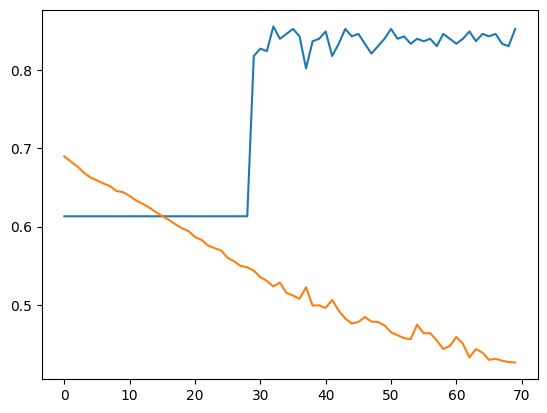

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
hist.history.keys()

In [ ]:
score = model.evaluate(x_test, y_test)
print(score)

6/6 [==============================] - 0s 3ms/step - loss: 0.3714 - accuracy: 0.8655
[0.3713892102241516, 0.8654970526695251]


# Conclusion

- During the activity, we've utilized the breast cancer diagnosis dataset in order to create a multilayer perceptron network, that will predict the likelihood of developing breast cancer. In order to evaluate which attributes are linked to diagnosis, we had used the correlation command to which then revelead that mean_radius, mean_perimeter, and mean_area had the strongest correlation to diagnosis.

- With this in mind we proceeded to split the data into testing and training, which will be then fitted into the model in order to train it. Upon multiple trials, it was concluded that 2 layers consisting of 25 and 5 nodes respectively produced the best output. We had utilized softmax activation for the output, as it is usually used for mutually exclusive classes, wherein an instance can only possess one class.



# Model Evaluation with All Attributes

In [ ]:
#including all attributes in the input layer

#splitting the dataset

from sklearn.model_selection import train_test_split

columnsdata2 = ['mean_radius', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_texture']
x2 = cancerFrame[list(columnsdata2)].values #this will be the input layer

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y,test_size = 0.3)

In [ ]:
#training the data on all the attributes

#creating the model

from keras.models import Sequential
from keras.layers import Dense #this is the hidden layer

#hidden layer

model2 = Sequential()
model2.add(Dense(25, activation = 'sigmoid'))
model2.add(Dense(5, activation = 'sigmoid'))


#output layer

model2.add(Dense(2, activation = 'softmax'))

#training

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

hist2 = model2.fit(x2_train, y2_train, epochs=70, batch_size=18,validation_split=0.2)

Epoch 1/70
18/18 [==============================] - 1s 15ms/step - loss: 0.6621 - accuracy: 0.6226 - val_loss: 0.6294 - val_accuracy: 0.6875
Epoch 2/70
18/18 [==============================] - 0s 5ms/step - loss: 0.6528 - accuracy: 0.6226 - val_loss: 0.6236 - val_accuracy: 0.6875
Epoch 3/70
18/18 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.6226 - val_loss: 0.6163 - val_accuracy: 0.6875
Epoch 4/70
18/18 [==============================] - 0s 5ms/step - loss: 0.6433 - accuracy: 0.6226 - val_loss: 0.6098 - val_accuracy: 0.6875
Epoch 5/70
18/18 [==============================] - 0s 4ms/step - loss: 0.6382 - accuracy: 0.6226 - val_loss: 0.6030 - val_accuracy: 0.6875
Epoch 6/70
18/18 [==============================] - 0s 5ms/step - loss: 0.6335 - accuracy: 0.6226 - val_loss: 0.5976 - val_accuracy: 0.6875
Epoch 7/70
18/18 [==============================] - 0s 5ms/step - loss: 0.6284 - accuracy: 0.6226 - val_loss: 0.5925 - val_accuracy: 0.6875
Epoch 8/70
18/18 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

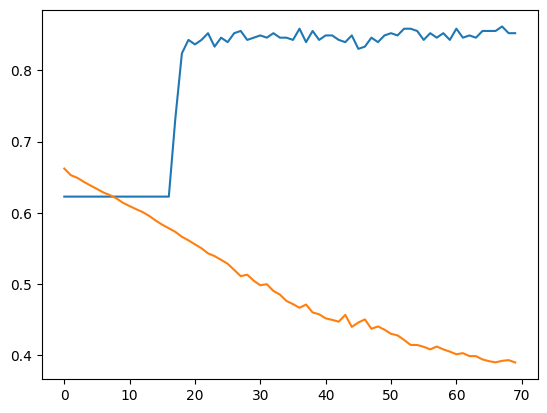

In [ ]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['loss'])
hist2.history.keys()

In [ ]:
#evaluation

score2 = model2.evaluate(x2_test, y2_test)
print(score2)

6/6 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.8947
[0.32093361020088196, 0.8947368264198303]


# Conclusion
- In the first model, we had only fitted three attributes into the input layer, due to it showing the most correlation. For this instance however, we neglected the correlation and applied all attributes into the input layer. Although the differences are only low, passing all the attributes into the input layer showed a better performance, leading to a lower loss by and higher accuracy.